<a href="https://colab.research.google.com/github/crestrepoz/Reclamaciones-y-Quejas/blob/main/Clasificacion_de_reclamaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np      ## sirve para manipular arrays
import pandas as pd     ## sirve para manipular dataframes
import matplotlib.pyplot as plt     ## sirve para realizar plots
import seaborn as sns               ## sirve para realizar plots

In [5]:
## Establecer la ruta de acceso

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ruta= 'gdrive/MyDrive/Proyecto_Reclamaciones'

In [9]:
# Cargar la base de datos

Reclamos=pd.read_csv('/content/gdrive/MyDrive/Proyecto_Reclamaciones/Base_Datos_202010.csv')
Reclamos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DANE_DEPTO,DANE_MUN,DANE_LOC,RADICADO,FECHA_RADICADO,TIPO_TRAMITE,CAUSAL,DETALLE_CAUSAL,NUI,FACTURA,TIPO_RTA,FECHA_RTA,RAD_RTA,FECHA_NOTIF,TIPO_NOTIF,F_SSPD
0,8,1,0,RE1110201706563,20-02-2017,1,F,118,20004567,7773659016,10,NaN,NaN,NaN,4,NaN
1,8,1,0,RE1110201713228,10-04-2017,1,F,102,17205311,2250644189,10,NaN,NaN,NaN,4,NaN
2,8,1,0,RE1110201731806,13-08-2017,1,F,122,17141535,2191113211,10,NaN,NaN,NaN,4,NaN
3,8,1,0,RE1110201732325,16-08-2017,1,F,102,17259404,2131679238,10,NaN,NaN,NaN,4,NaN
4,8,1,0,RE1110201734341,31-08-2017,1,F,102,19677691,7627906055,10,NaN,NaN,NaN,4,NaN


In [10]:
## Revisar el tamaño del dataset

Reclamos.shape

(66199, 16)

In [11]:
## Obtener el tipo de dato de cada variable y la totalidad de las entradas

Reclamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66199 entries, 0 to 66198
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DANE_DEPTO      66199 non-null  int64 
 1   DANE_MUN        66199 non-null  int64 
 2   DANE_LOC        66199 non-null  int64 
 3   RADICADO        66199 non-null  object
 4   FECHA_RADICADO  66199 non-null  object
 5   TIPO_TRAMITE    66199 non-null  int64 
 6   CAUSAL          66199 non-null  object
 7   DETALLE_CAUSAL  66199 non-null  int64 
 8   NUI             66199 non-null  int64 
 9   FACTURA         66199 non-null  object
 10  TIPO_RTA        66199 non-null  int64 
 11  FECHA_RTA       34995 non-null  object
 12  RAD_RTA         34995 non-null  object
 13  FECHA_NOTIF     6848 non-null   object
 14  TIPO_NOTIF      66199 non-null  int64 
 15  F_SSPD          1243 non-null   object
dtypes: int64(8), object(8)
memory usage: 8.1+ MB


In [12]:
## Se elimina la variable que no aporta informacion al proposito del proyecto, como numero de radicado, NUI (Identificacion del cliente), numero de factura dado que son distintas siempre

Reclamos = Reclamos.drop(['RADICADO', 'NUI', 'FACTURA'], axis = 1)

In [13]:
## revisar si existen datos faltantes dentro del dataframe

Reclamos.isnull().sum()

DANE_DEPTO            0
DANE_MUN              0
DANE_LOC              0
FECHA_RADICADO        0
TIPO_TRAMITE          0
CAUSAL                0
DETALLE_CAUSAL        0
TIPO_RTA              0
FECHA_RTA         31204
RAD_RTA           31204
FECHA_NOTIF       59351
TIPO_NOTIF            0
F_SSPD            64956
dtype: int64

In [14]:
## Se elimina la variable FECHA_RTA, RAD_RTA, FECHA_NOTIF, F_SSPD dado que no aporta informacion relevante al proposito del proyecto y se tienen varios campos nulos

Reclamos = Reclamos.drop(['FECHA_RTA', 'RAD_RTA', 'FECHA_NOTIF', 'F_SSPD'], axis = 1)

In [15]:
## se revisa nuevamente si existen datos faltantes dentro del dataframe

Reclamos.isnull().sum()

DANE_DEPTO        0
DANE_MUN          0
DANE_LOC          0
FECHA_RADICADO    0
TIPO_TRAMITE      0
CAUSAL            0
DETALLE_CAUSAL    0
TIPO_RTA          0
TIPO_NOTIF        0
dtype: int64

In [16]:
## Revisar el tamaño del dataset

Reclamos.shape

(66199, 9)

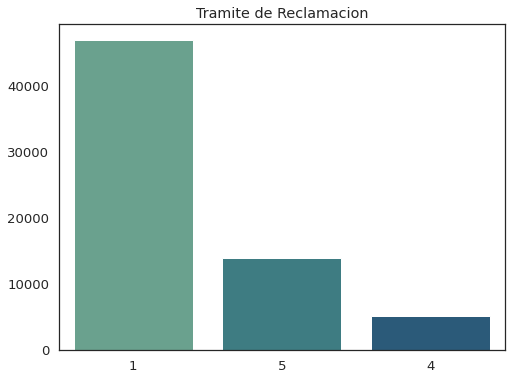

In [17]:
# Se grafica la variable objetivo, en este caso es el tipo de tramite de reclamacion

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(8,6))
ax = sns.countplot(x = Reclamos['TIPO_TRAMITE'], data = Reclamos, palette = 'crest', order = Reclamos.TIPO_TRAMITE.value_counts().index)
plt.title('Tramite de Reclamacion')
ax.set(xlabel=None, ylabel=None)
plt.show()

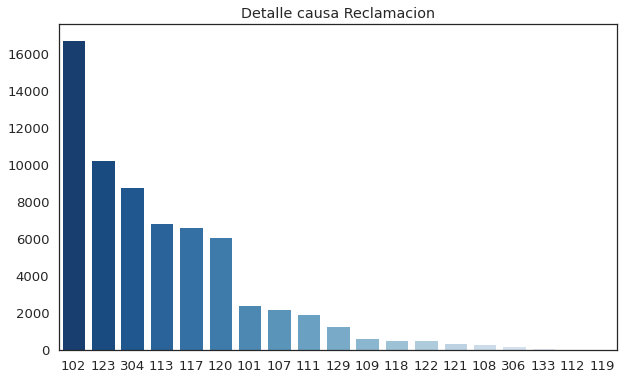

In [18]:
# Se grafica la variable detalle de causal, la cual es una variable categorica
sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(10,6))
ax = sns.countplot(x = Reclamos['DETALLE_CAUSAL'], data = Reclamos, palette = 'Blues_r', order = Reclamos.DETALLE_CAUSAL.value_counts().index)
plt.title('Detalle causa Reclamacion')
ax.set(xlabel=None, ylabel=None)
plt.show()

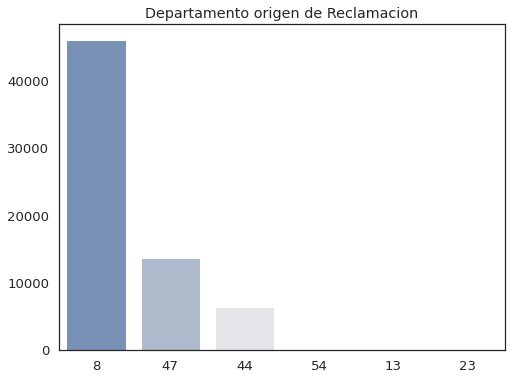

In [19]:
# Se grafica la variable departamento, la cual es una variable categorica

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(8,6))
ax = sns.countplot(x = Reclamos['DANE_DEPTO'], data = Reclamos, palette = 'vlag', order = Reclamos.DANE_DEPTO.value_counts().index)
plt.title('Departamento origen de Reclamacion')
ax.set(xlabel=None, ylabel=None)
plt.show()


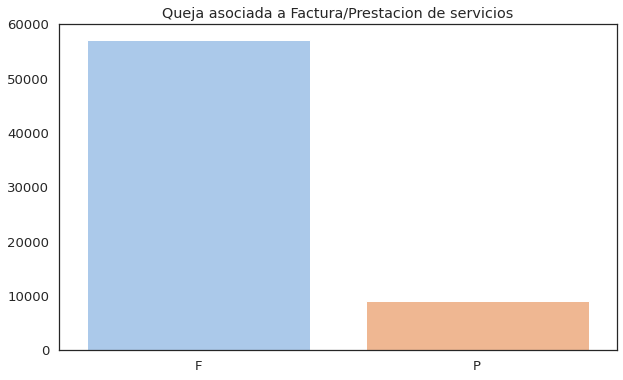

In [20]:
# Se grafica la variable causal, la cual es una variable categorica

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(10,6))
ax = sns.countplot(x = Reclamos['CAUSAL'], data = Reclamos, palette = 'pastel', order = Reclamos.CAUSAL.value_counts().index)
plt.title('Queja asociada a Factura/Prestacion de servicios')
ax.set(xlabel=None, ylabel=None)
plt.show()

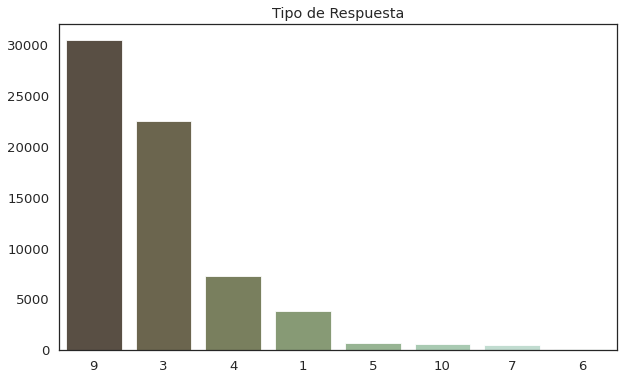

In [21]:
# Se grafica la variable tipo de respuesta, la cual es una variable categorica

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(10,6))
ax = sns.countplot(x = Reclamos['TIPO_RTA'], data = Reclamos, palette = 'ch:1,r=.5,l=.9_r', order = Reclamos.TIPO_RTA.value_counts().index, alpha = 0.8)
plt.title('Tipo de Respuesta')
ax.set(xlabel=None, ylabel=None)
plt.show()

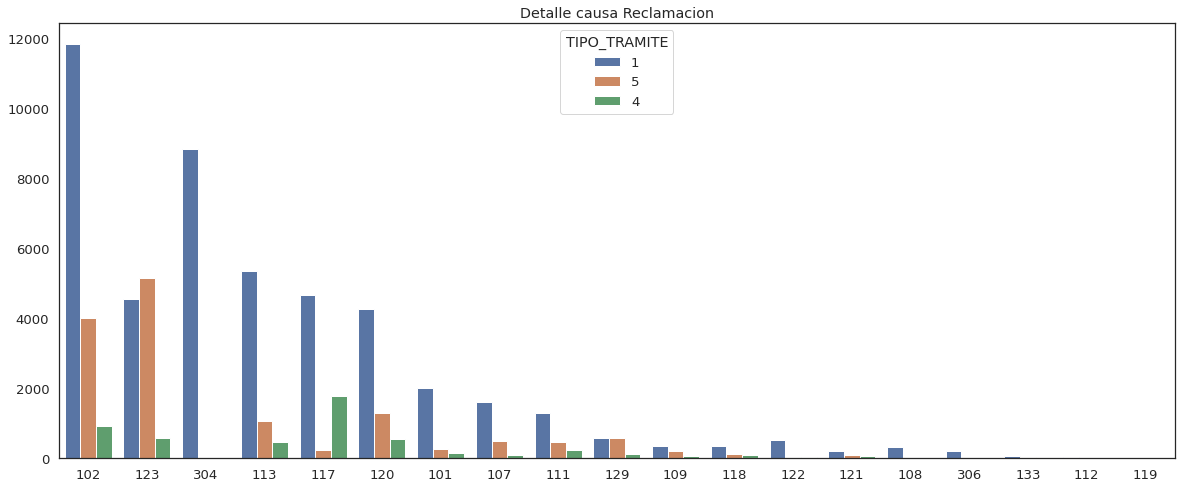

In [22]:
# Se grafica el detalle causal dividido cada uno por el tipo de tramite (nuestra variable objetivo)

sns.set(font_scale = 1.2)
sns.set_style('white')
plt.figure(figsize=(20,8))
ax = sns.countplot(x = Reclamos['DETALLE_CAUSAL'], data = Reclamos, hue = Reclamos['TIPO_TRAMITE'] ,order = Reclamos.DETALLE_CAUSAL.value_counts().index, hue_order=Reclamos.TIPO_TRAMITE.value_counts().index)
plt.title('Detalle causa Reclamacion')
ax.set(xlabel=None, ylabel=None)
plt.show()

# Entrenamiento del modelo de clasificacion

In [23]:
# Se definen las variables X a usar para entrenar el modelo y su Y correspondientes

Reclamos_names = ['DANE_DEPTO','DANE_MUN','DETALLE_CAUSAL','TIPO_RTA', 'TIPO_NOTIF']
X = Reclamos[Reclamos_names]
y = Reclamos['TIPO_TRAMITE']

In [24]:
# Compute training, validation and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1)

print(X_train.shape)
print(X_val.shape)
# No tocar
print(X_test.shape)

(37236, 5)
(12413, 5)
(16550, 5)


In [25]:
# Scale features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## Comparacion de modelos de validacion

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
print('Accuracy of K-NN-1 classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))
print('Accuracy of K-NN-1 classifier on validation set: {:.2f}'
     .format(knn1.score(X_val, y_val)))

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
print('Accuracy of K-NN-2 classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print('Accuracy of K-NN-2 classifier on validation set: {:.2f}'
     .format(knn2.score(X_val, y_val)))

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
print('Accuracy of K-NN-2 classifier on training set: {:.2f}'
     .format(knn3.score(X_train, y_train)))
print('Accuracy of K-NN-2 classifier on validation set: {:.2f}'
     .format(knn3.score(X_val, y_val)))

Accuracy of K-NN-1 classifier on training set: 0.82
Accuracy of K-NN-1 classifier on validation set: 0.81
Accuracy of K-NN-2 classifier on training set: 0.86
Accuracy of K-NN-2 classifier on validation set: 0.86
Accuracy of K-NN-2 classifier on training set: 0.85
Accuracy of K-NN-2 classifier on validation set: 0.84


## Linear discriminant analysis

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on validation set: {:.2f}'
     .format(lda.score(X_val, y_val)))

Accuracy of LDA classifier on training set: 0.81
Accuracy of LDA classifier on validation set: 0.81


## Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on validation set: {:.2f}'
     .format(gnb.score(X_val, y_val)))

Accuracy of GNB classifier on training set: 0.80
Accuracy of GNB classifier on validation set: 0.80


## Support Vector Machine

In [29]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on validation set: {:.2f}'
     .format(svm.score(X_val, y_val)))

Accuracy of SVM classifier on training set: 0.86
Accuracy of SVM classifier on validation set: 0.86


## Test

In [30]:
# El modelo que mejor precision tiene es el SVM, con un accuaracy de 0.86 en la validacion

print('Accuracy of svm classifier on validation set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of svm classifier on validation set: 0.86


## Detalles del set de test

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[11702     0    21]
 [  569   537   193]
 [ 1445   148  1935]]
              precision    recall  f1-score   support

           1       0.85      1.00      0.92     11723
           4       0.78      0.41      0.54      1299
           5       0.90      0.55      0.68      3528

    accuracy                           0.86     16550
   macro avg       0.85      0.65      0.71     16550
weighted avg       0.86      0.86      0.84     16550

